<img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY" style="display:block; margin:auto; border:0px solid red;" width=50% height='250'/>

<p style="background-color:romance; color:plum; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bold; font-size:220%; line-height:1.4; text-transform: uppercase;">WAY TO REINVENT YOURSELF</p>

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1" style="display:block; margin:auto; border:1px solid LightGrey;" width=75% height='250'/>

<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bolder; font-size:3em; line-height:1.4; text-transform:capitalize;"><strong>Concrete Slump Test Regression</strong></p>

<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:normal; font-size:2em; line-height:1.4; text-transform:capitalize;">Regression problems with EDA</p> 

<basefont size="2" face ="arial, verdana, sans-serif" color="jaguar">

**WELCOME!**

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

- The concrete slump test measures the consistency of fresh concrete before it sets. 
- It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. 
- It can also be used as an indicator of an improperly mixed batch.


- **Input variables(9)**: 
  - (component kg in one M^3 concrete)(7):
    * Cement
    * Slag
    * Fly ash
    * Water
    * SP
    * Coarse Aggr.
    * Fine Aggr.
  - (Measurements)(2)
    * SLUMP (cm)
    * FLOW (cm)
    
    
- **Target variable (1)**:
  * 28-day Compressive Strength (Mpa)

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# 1. Import Libraries, Load Dataset, Exploring Data

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.6f}')
# pd.set_option('display.float_format', lambda x: '%.6f' % x)
# pd.options.display.float_format = '{:.3f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 60)

In [2]:
# conda install -c anaconda scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# Supervised-Regression-metrics
# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
# conda install -c districtdatalabs yellowbrick
# yellowbrick library for visualizing the model performance
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

In [4]:
params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'c',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

In [5]:
random_state=42

# Loading data

In [6]:
df_origin = pd.read_csv('./cement_slump.csv')
df = df_origin
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000000,82.000000,105.000000,210.000000,9.000000,904.000000,680.000000,23.000000,62.000000,34.990000
1,163.000000,149.000000,191.000000,180.000000,12.000000,843.000000,746.000000,0.000000,20.000000,41.140000
2,162.000000,148.000000,191.000000,179.000000,16.000000,840.000000,743.000000,1.000000,20.000000,41.810000
3,162.000000,148.000000,190.000000,179.000000,19.000000,838.000000,741.000000,3.000000,21.500000,42.080000
4,154.000000,112.000000,144.000000,220.000000,10.000000,923.000000,658.000000,20.000000,64.000000,26.820000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.000000,229.894175,78.877230,137.000000,152.000000,248.000000,303.900000,374.000000
Slag,103.000000,77.973786,60.461363,0.000000,0.050000,100.000000,125.000000,193.000000
Fly ash,103.000000,149.014563,85.418080,0.000000,115.500000,164.000000,235.950000,260.000000
Water,103.000000,197.167961,20.208158,160.000000,180.000000,196.000000,209.500000,240.000000
SP,103.000000,8.539806,2.807530,4.400000,6.000000,8.000000,10.000000,19.000000
Coarse Aggr.,103.000000,883.978641,88.391393,708.000000,819.500000,879.000000,952.800000,1049.900000
Fine Aggr.,103.000000,739.604854,63.342117,640.600000,684.500000,742.700000,788.000000,902.000000
SLUMP(cm),103.000000,18.048544,8.750844,0.000000,14.500000,21.500000,24.000000,29.000000
FLOW(cm),103.000000,49.610680,17.568610,20.000000,38.500000,54.000000,63.750000,78.000000
Compressive Strength (28-day)(Mpa),103.000000,36.038738,7.837120,17.190000,30.900000,35.520000,41.205000,58.530000


# EDA and Graphical analysis

## Multicolinarity Check Colorized Correlation

In [9]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [10]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

In [11]:
check_multicolinarity(df)

Multicolinarity Data (2, 2)


,SLUMP(cm),FLOW(cm)
SLUMP(cm),nan,0.906135
FLOW(cm),0.906135,nan


## Correlation between independent variable and dependent variable

In [12]:
df.corr()['Compressive Strength (28-day)(Mpa)'].sort_values(key=abs, ascending=False)

Compressive Strength (28-day)(Mpa)    1.000000
Cement                                0.445656
Fly ash                               0.444380
Slag                                 -0.331522
Water                                -0.254320
SLUMP(cm)                            -0.223499
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
FLOW(cm)                             -0.124189
SP                                   -0.037909
Name: Compressive Strength (28-day)(Mpa), dtype: float64

## Graphical analysis

### Heatmap

<AxesSubplot:>

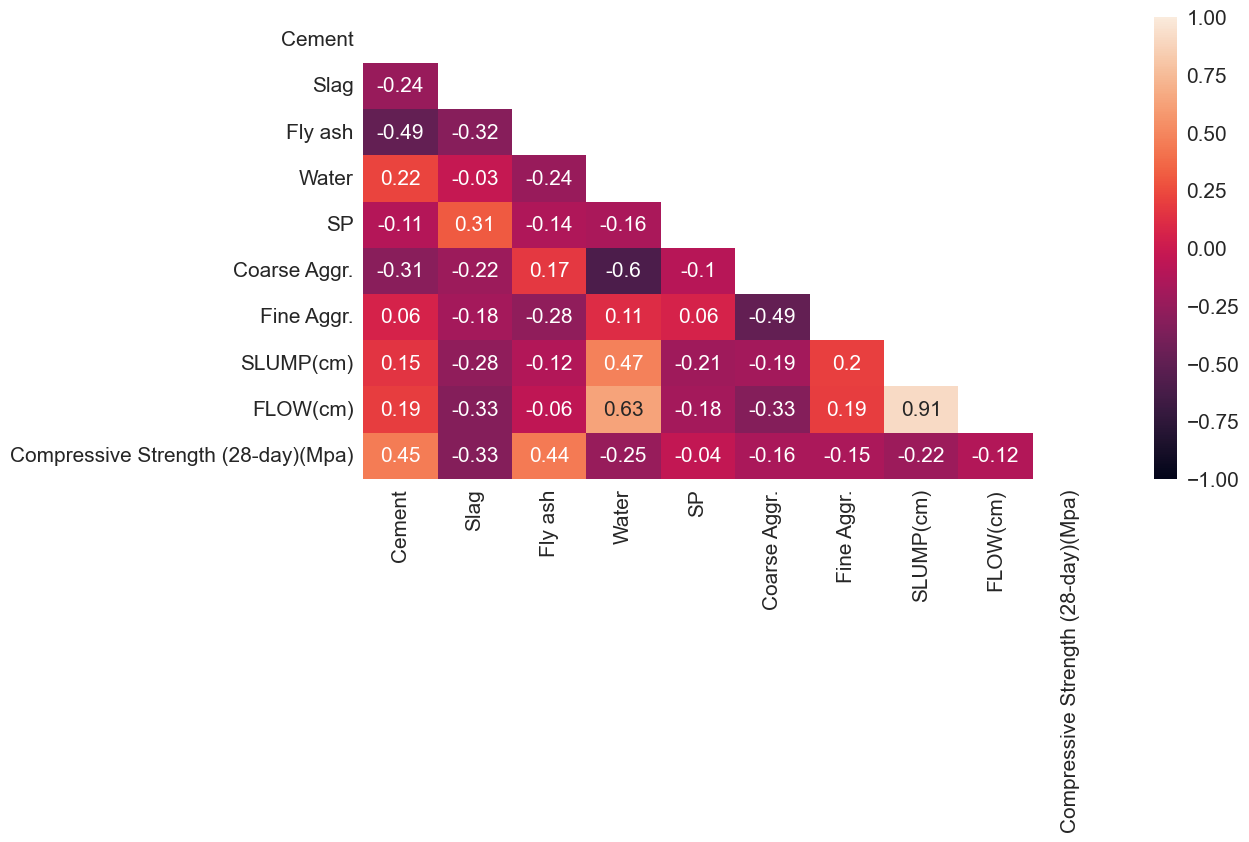

In [13]:
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
)

<AxesSubplot:>

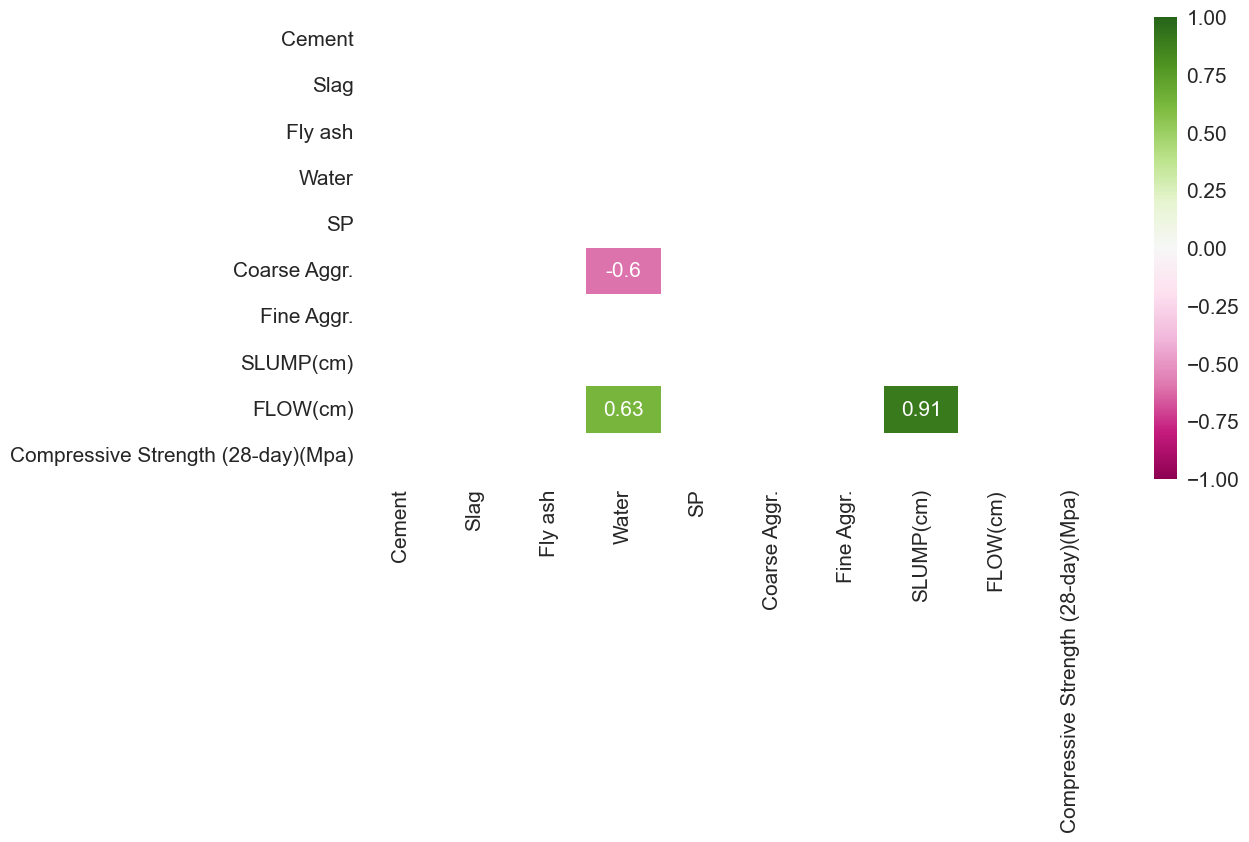

In [14]:
df_corr = df.corr()
filteredDf = df_corr[(abs(df_corr) >=.6) & (abs(df_corr)!=1)]
sns.heatmap(
    filteredDf, 
    mask=np.triu(np.ones_like(df_corr, dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap="PiYG"
)

In [15]:
df.corr().unstack().drop_duplicates().sort_values(key=abs, ascending=False).to_frame('Corr').head(5)

Corr
Cement       Cement        1.000000
SLUMP(cm)    FLOW(cm)      0.906135
Water        FLOW(cm)      0.632026
             Coarse Aggr. -0.602201
Coarse Aggr. Fine Aggr.   -0.488537

## Pairplot - Distribution of Features

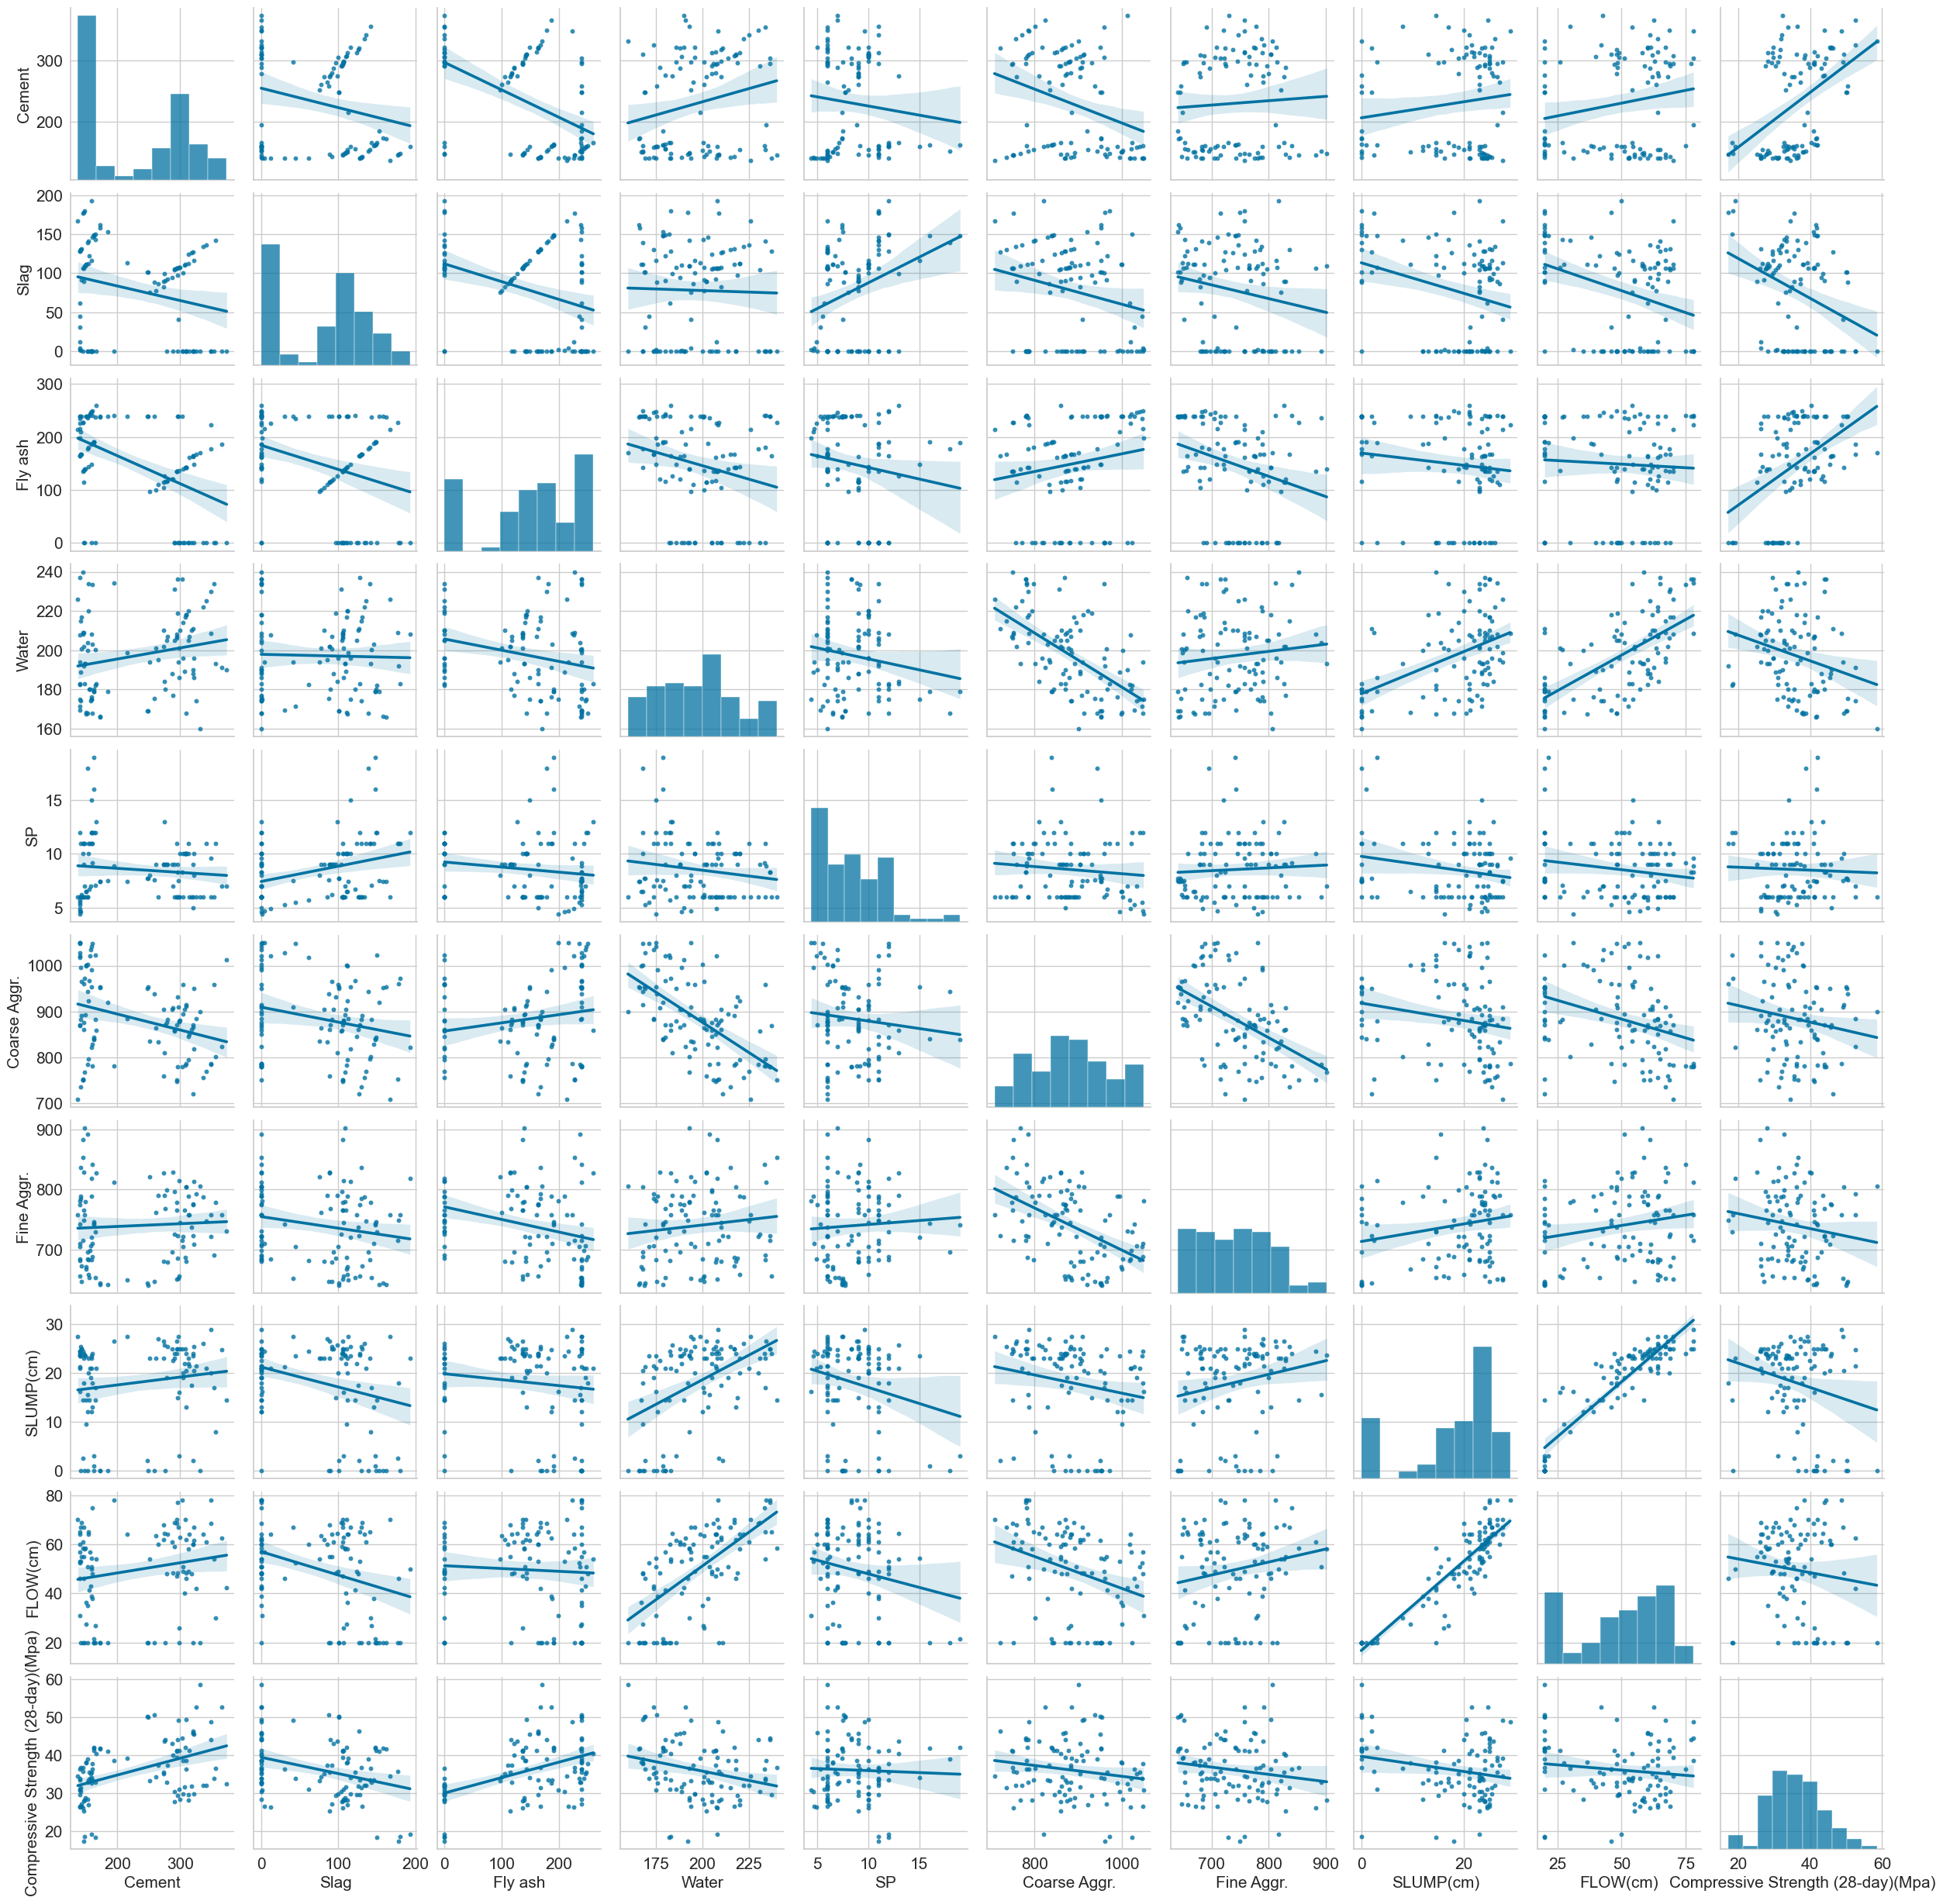

In [16]:
sns.pairplot(df, kind='reg', plot_kws={'scatter_kws':{'s':18}})

### Boxplot

<AxesSubplot:>

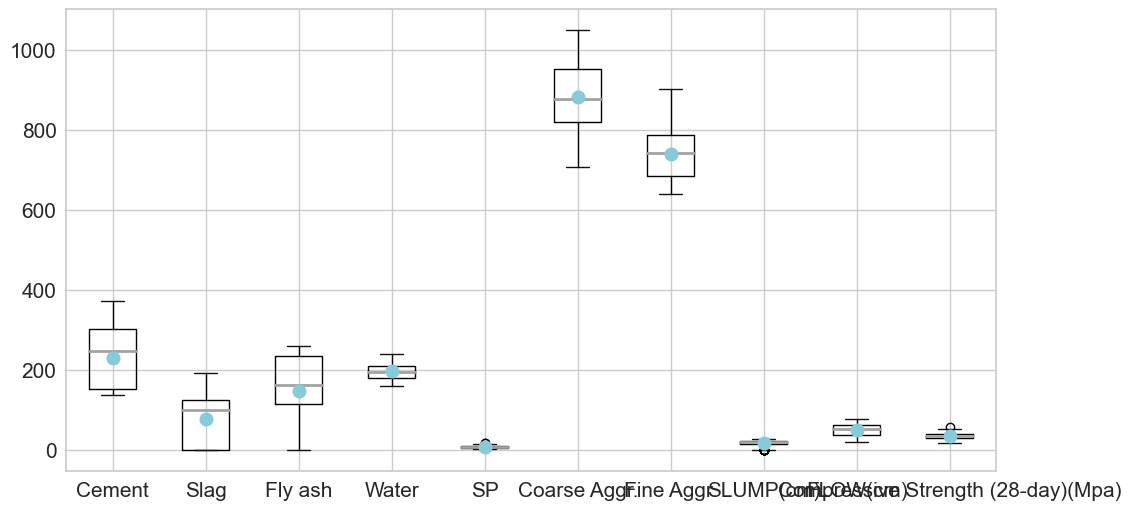

In [17]:
df.boxplot()

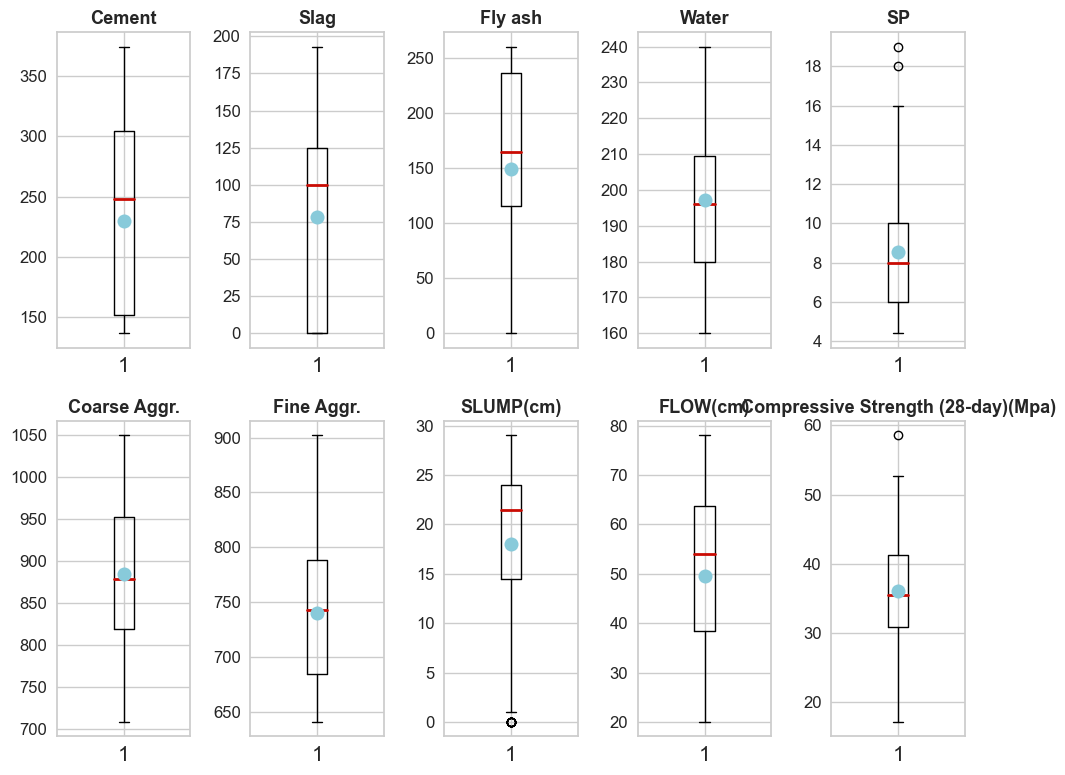

In [18]:
numbers = df.select_dtypes(include='number').columns

fig = plt.figure(figsize=(10, 8))
for i, col in enumerate(numbers):
    plt.subplot(int(np.ceil(len(numbers)/5)), 5, i+1)
    plt.boxplot(df[col])
    plt.gca().set_title(col, fontsize=13, fontweight='bold')
    plt.gca().tick_params(axis='y', labelsize=12)
    plt.tight_layout()

# Data Preprocessing 

## Features and Target variable
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [19]:
X = df.drop(columns='Compressive Strength (28-day)(Mpa)')
y = df['Compressive Strength (28-day)(Mpa)']

## Train & Test
- Split the data into training and testing sets
- get_dummies for X_train and X_test - for data separated by ','
- OneHotEncoder for X_train and X_test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state) 

## Scaling the Data
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [23]:
# will be used in pipeline later
scaler = StandardScaler() 

In [24]:
# Use train - calc mean and sd
# if you don't use pipeline, you can use scaler directly
scaler.fit(X_train)

StandardScaler()

In [25]:
# Use scaler calc scaled data
X_train_scaled = scaler.transform(X_train) 
X_test_scaled  = scaler.transform(X_test)

In [26]:
# check X_train_scaled
pd.DataFrame(X_train_scaled, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,82.000000,-0.000000,1.006154,-1.180229,-0.990318,0.020010,0.933483,1.820369
Slag,82.000000,0.000000,1.006154,-1.297210,-1.295158,0.360864,0.800008,1.871189
Fly ash,82.000000,0.000000,1.006154,-1.649362,-0.376828,0.208311,1.037447,1.191117
Water,82.000000,-0.000000,1.006154,-1.781644,-0.839996,-0.094016,0.566361,2.131697
SP,82.000000,0.000000,1.006154,-1.423970,-0.874324,-0.290324,0.499793,3.591555
Coarse Aggr.,82.000000,0.000000,1.006154,-2.054253,-0.707824,-0.084425,0.737949,1.838719
Fine Aggr.,82.000000,0.000000,1.006154,-1.582879,-0.880831,0.088205,0.721495,2.621368
SLUMP(cm),82.000000,-0.000000,1.006154,-1.960431,-0.348988,0.415058,0.706785,1.262455
FLOW(cm),82.000000,-0.000000,1.006154,-1.591123,-0.918211,0.189291,0.836969,1.661287


In [27]:
# check X_test_scaled
pd.DataFrame(X_test_scaled, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,21.000000,-0.020203,0.992898,-1.135916,-0.964996,0.361850,0.870813,1.503850
Slag,21.000000,-0.084103,0.958420,-1.297210,-1.297210,0.163865,0.541447,1.608524
Fly ash,21.000000,0.214479,0.815606,-1.649362,-0.104142,0.248078,0.929793,1.304736
Water,21.000000,0.178986,0.925619,-1.390310,-0.656558,0.321777,0.664194,1.945813
SP,21.000000,-0.008957,0.802464,-1.355264,-0.874324,0.156264,0.499793,1.530380
Coarse Aggr.,21.000000,-0.247737,1.007321,-1.746823,-1.200281,-0.209674,0.393799,1.472080
Fine Aggr.,21.000000,0.046464,1.091523,-1.496028,-0.852685,-0.259201,0.807141,2.315780
SLUMP(cm),21.000000,0.222558,0.825903,-1.960431,-0.015586,0.595651,0.817919,0.984620
FLOW(cm),21.000000,0.340029,0.867921,-1.591123,-0.020994,0.651918,0.876222,1.605211


### Checking Scaled Data - std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.

In [28]:
def check_scaled_data(train, test, columns=X.columns, agg=["mean", "std", min, max]):
    #Applying aggregation across all the columns, mean and std will be found for each column in the dataframe
    train = pd.DataFrame(train, columns=columns).agg(agg) 
    test = pd.DataFrame(test, columns=columns).agg(agg)
    return pd.concat([train, test], keys=["train", "test"]).T

In [29]:
check_scaled_data(X_train_scaled, X_test_scaled).head().round()

train                                  test                     \
             mean      std       min      max      mean      std       min   
Cement  -0.000000 1.000000 -1.000000 2.000000 -0.000000 1.000000 -1.000000   
Slag     0.000000 1.000000 -1.000000 2.000000 -0.000000 1.000000 -1.000000   
Fly ash  0.000000 1.000000 -2.000000 1.000000  0.000000 1.000000 -2.000000   
Water   -0.000000 1.000000 -2.000000 2.000000  0.000000 1.000000 -1.000000   
SP       0.000000 1.000000 -1.000000 4.000000 -0.000000 1.000000 -1.000000   

                  
             max  
Cement  2.000000  
Slag    2.000000  
Fly ash 1.000000  
Water   2.000000  
SP      2.000000

#  1. Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

## Linear Model Fitting and Predicting - without Pipeline and without Scale

In [30]:
from sklearn.linear_model import LinearRegression

# will be used in pipeline later
lin_model = LinearRegression() 

lin_model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lin_model.predict(X_test)
y_train_pred = lin_model.predict(X_train)

In [32]:
def check_pred_data_describe(y_pred, y_train_pred):
    test = pd.DataFrame(y_pred, columns=['y_pred']).describe().T
    train = pd.DataFrame(y_train_pred, columns=['y_train_pred']).describe().T
    return pd.concat([test, train])

In [33]:
check_pred_data_describe(y_pred, y_train_pred)

,count,mean,std,min,25%,50%,75%,max
y_pred,21.000000,37.133398,6.736897,27.054030,30.864899,37.358593,42.560118,49.008115
y_train_pred,82.000000,35.847195,7.622170,17.256530,30.601279,35.967594,40.493695,52.198352


In [34]:
pd.concat([y_test, y_train], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Compressive Strength (28-day)(Mpa),21.000000,36.786667,7.288833,26.020000,31.370000,35.520000,43.010000,50.500000
Compressive Strength (28-day)(Mpa),82.000000,35.847195,8.002769,17.190000,30.530000,35.790000,41.107500,58.530000


### Evaluation-Error Metric Check R^2 Score
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# same train_val function
def get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, model_name="linear"):      
    train = pd.Series({
            "R2"   : r2_score(y_train, y_train_pred),
            "MAE"  : mean_absolute_error(y_train, y_train_pred),
            "MSE"  : mean_squared_error(y_train, y_train_pred),                          
            "RMSE" : np.sqrt(mean_squared_error(y_train, y_train_pred))}).to_frame(model_name+"_train")

    test = pd.DataFrame.from_dict({
            "R2"   : r2_score(y_test, y_pred),
            "MAE"  : mean_absolute_error(y_test, y_pred),
            "MSE"  : mean_squared_error(y_test, y_pred),
            "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred))}, orient='index', columns=[model_name+"_test"])

    # merge (inner join by default)
    scores1 = pd.merge(train, test, left_index=True, right_index=True)
    
#     # join (left join by default)
#     scores2 = train.join(test)
#     # concat (outer join by default)
#     scores3 = pd.concat([train, test], axis=1)
#     # append not recommended - use concat
#     scores4 = train.append(test)
    
    # convert MultiIndex
    cols = scores1.columns.str.extract(r'(.+)_(.+)', expand=True)
    scores1.columns = pd.MultiIndex.from_arrays((cols[0], cols[0]+'_'+cols[1]))
    
    return scores1

In [36]:
get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "linear")

0          linear            
     linear_train linear_test
R2       0.907145    0.911967
MAE      1.936263    1.740383
MSE      5.874313    4.454237
RMSE     2.423698    2.110506

In [37]:
# Evaluate the result. Overfitting?
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.907145,0.911967
mae,1.936263,1.740383
mse,5.874313,4.454237
rmse,2.423698,2.110506


### Linear Model Cross Validation - Data not Scaled X_train or Scaled X_train_scaled

In [38]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [39]:
from sklearn.model_selection import cross_validate, cross_val_score

model = LinearRegression()

# cross_validate with empty model - fit and predict 
# Check not Scaled X_train or Scaled X_train_scaled
scores = cross_validate(
    model, X_train_scaled, y_train, 
    scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error'], 
    cv = 5
)
df_scores_lm = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lm

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.001989,0.002211,0.942208,-1.908524,-4.645188,-2.155270
1,0.002792,0.002142,0.706629,-2.647319,-10.756658,-3.279734
2,0.002001,0.002000,0.865934,-1.482831,-3.725762,-1.930223
3,0.001998,0.002000,0.923166,-2.244108,-8.434009,-2.904137
4,0.002000,0.002312,0.792889,-2.867905,-11.698265,-3.420273


In [40]:
df_scores_lm.iloc[:, 2:].mean()

test_r2                             0.846165
test_neg_mean_absolute_error       -2.230137
test_neg_mean_squared_error        -7.851977
test_neg_root_mean_squared_error   -2.737927
dtype: float64

In [41]:
# crosscheck before-after
ls

,linear_train,linear_test
R2,0.907145,0.911967
mae,1.936263,1.740383
mse,5.874313,4.454237
rmse,2.423698,2.110506


In [42]:
# check error
2.423698/y.mean()

0.06725257718905493

#### RMSE check Cross Validation 

In [43]:
 def check_cv_rmse_mean_div_target(train_rmse_mean, cv_rmse_mean, y=y, df=df):
    return pd.DataFrame.from_dict({
        "train RMSE percent(%)": train_rmse_mean/y.mean(),
        "CV RMSE percent(%)"   : cv_rmse_mean/y.mean()}
        , orient='index', columns=['RMSE/target(label)_percent(%)'])  

In [44]:
check_cv_rmse_mean_div_target(
    np.sqrt(mean_squared_error(y_train, y_train_pred)), 
    df_scores_lm['test_neg_root_mean_squared_error'].mean()) 

,RMSE/target(label)_percent(%)
train RMSE percent(%),0.067253
CV RMSE percent(%),-0.075972


### Coefficient - Slope Calculate 

In [45]:
def get_coeff_intercept(coeff_, intercept_, model_name='linear', X=X):
    coefficients = pd.DataFrame(coeff_, columns = [f'Coefficient_{model_name}'], index = X.columns)
    intercept    = pd.DataFrame({f'Coefficient_{model_name}': intercept_}, index=['intercept'])
    return pd.concat([coefficients, intercept])

In [46]:
# Calc Slope
lm_df = get_coeff_intercept(
    lin_model.coef_, 
    lin_model.intercept_
)
lm_df

,Coefficient_linear
Cement,0.054190
Slag,-0.036492
Fly ash,0.044675
Water,-0.233374
SP,0.041601
Coarse Aggr.,-0.060089
Fine Aggr.,-0.041999
SLUMP(cm),-0.243203
FLOW(cm),0.082191
intercept,149.990175


### **Result:________**

- next step Regularization

## Calc Residuals and Compare Actual and Predicted Labels 

### Calculate Manual Actual and Predicted Labels 

In [47]:
df_comparing = pd.DataFrame({"Actual": y_test, "Prediction": y_pred, "Residual":y_pred-y_test})
df_comparing.head()

,Actual,Prediction,Residual
30,45.820000,44.888792,-0.931208
67,40.340000,41.416085,1.076085
62,28.290000,28.566116,0.276116
47,43.010000,39.400108,-3.609892
42,33.510000,35.142947,1.632947


In [48]:
lm_df

,Coefficient_linear
Cement,0.054190
Slag,-0.036492
Fly ash,0.044675
Water,-0.233374
SP,0.041601
Coarse Aggr.,-0.060089
Fine Aggr.,-0.041999
SLUMP(cm),-0.243203
FLOW(cm),0.082191
intercept,149.990175


In [49]:
# Sample Data
X_test.loc[30]

Cement         321.000000
Slag             0.000000
Fly ash        164.000000
Water          190.000000
SP               5.000000
Coarse Aggr.   870.000000
Fine Aggr.     774.000000
SLUMP(cm)       24.000000
FLOW(cm)        60.000000
Name: 30, dtype: float64

In [50]:
# y_pred = slope*X + intercept
# y_pred = b1*X + b0

In [51]:
lin_model.coef_*X_test.loc[30]

Cement          17.394970
Slag            -0.000000
Fly ash          7.326745
Water          -44.341051
SP               0.208006
Coarse Aggr.   -52.277209
Fine Aggr.     -32.507426
SLUMP(cm)       -5.836878
FLOW(cm)         4.931460
Name: 30, dtype: float64

In [52]:
# Calc Prediction vs Actual
y_test.loc[30], sum(lin_model.coef_*X_test.loc[30]) + lin_model.intercept_

(45.82, 44.88879166778861)

In [53]:
df_comparing.sort_values(by='Residual', key=abs, ascending=False).head()

,Actual,Prediction,Residual
18,49.300000,44.674230,-4.625770
47,43.010000,39.400108,-3.609892
40,35.660000,39.031969,3.371969
33,35.520000,38.764309,3.244309
31,43.950000,46.743147,2.793147


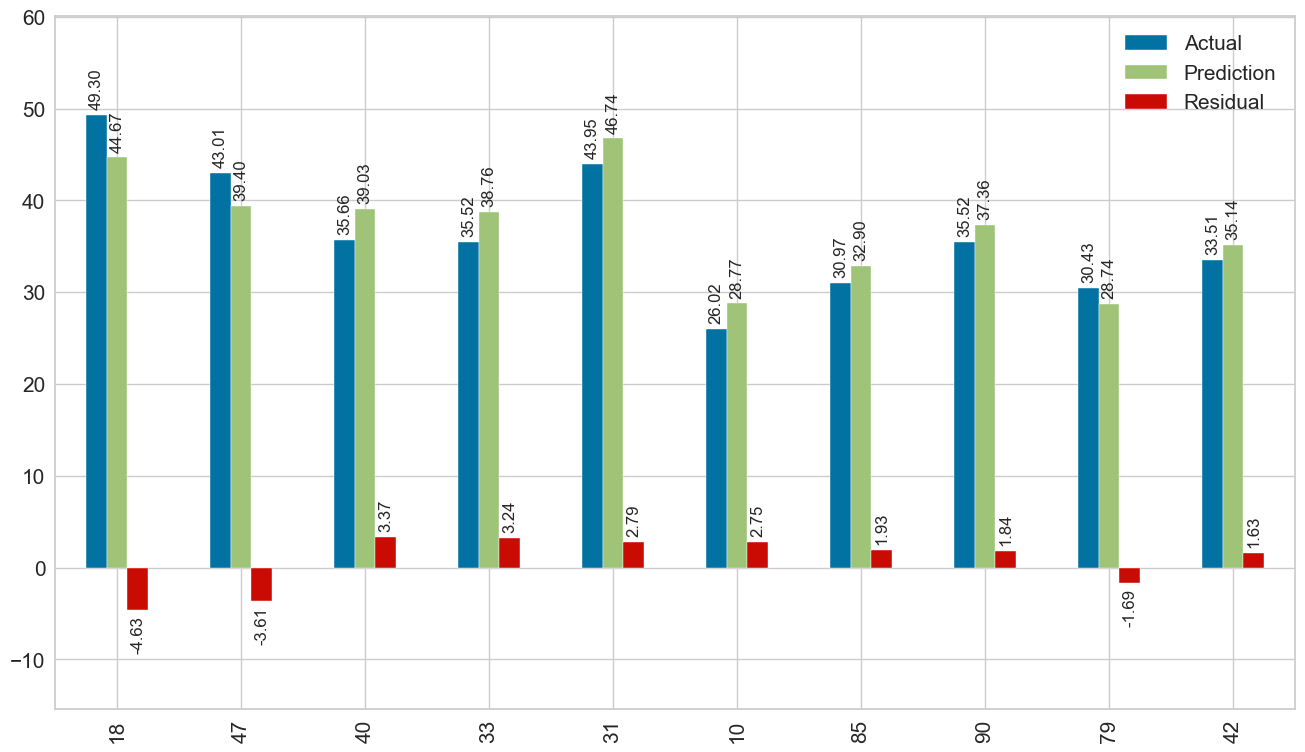

In [54]:
g = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head(10).plot.bar(figsize=(16,9))

# annotate
for i in g.containers:
    g.bar_label(i, fmt='%.2f', fontsize=12, rotation=90, padding=4)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.2) 

# tick_params(xaxis.set_tick_params) rotation or labelrotation
g.tick_params(axis='x', labelrotation=90)

### Check Residuals - Scatterplot

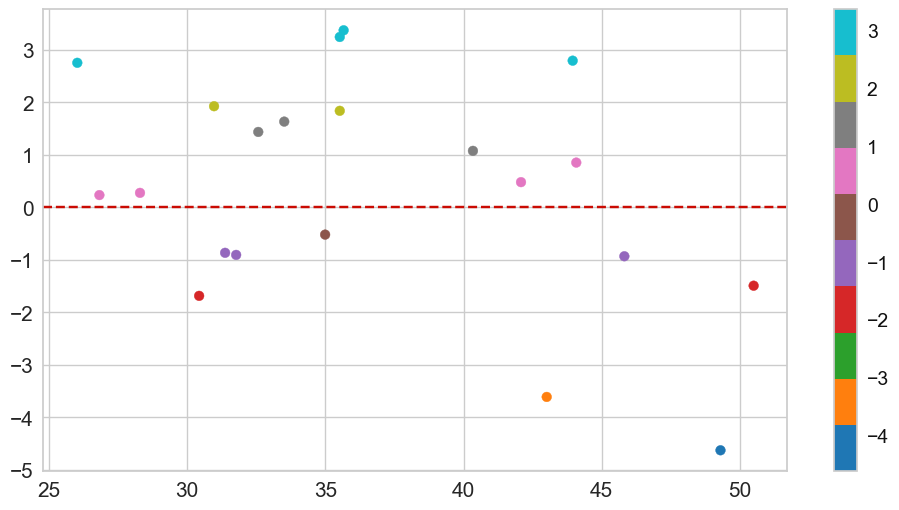

In [55]:
# Residuals scatterplot
plt.scatter(x=y_test, y=(y_pred-y_test), c=(y_pred-y_test), cmap= 'tab10') 
plt.axhline(y = 0, color ="r", linestyle = "--")

# colorbar tick_params
plt.colorbar().ax.tick_params(axis='both', labelsize=14, colors='k')

### Check Residuals - Probplot

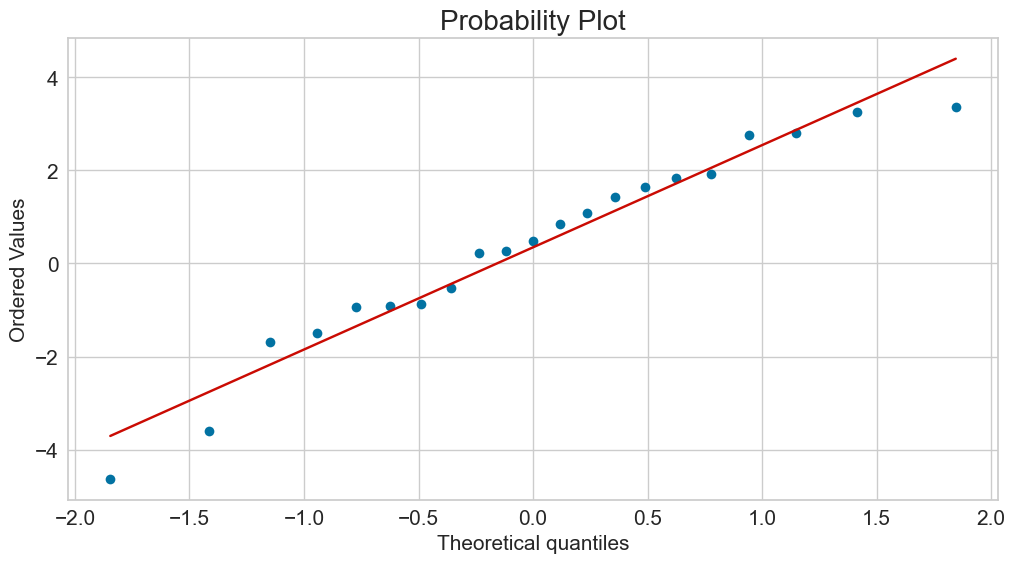

In [56]:
stats.probplot((y_pred-y_test), dist ="norm", plot =plt);

In [57]:
stats.describe((y_pred-y_test))

DescribeResult(nobs=21, minmax=(-4.625770038066349, 3.3719689014969276), mean=0.3467315737071606, variance=4.550714705627144, skewness=-0.6026499074920298, kurtosis=-0.13022252286256775)

In [58]:
df_comparing.skew()

Actual        0.392932
Prediction    0.125475
Residual     -0.650034
dtype: float64

In [59]:
pd.DataFrame.from_dict(stats.describe((y_pred-y_test))._asdict(), orient='index')

,0
nobs,21
minmax,"(-4.625770038066349, 3.3719689014969276)"
mean,0.346732
variance,4.550715
skewness,-0.602650
kurtosis,-0.130223


### Check Residuals - ResidualsPlot

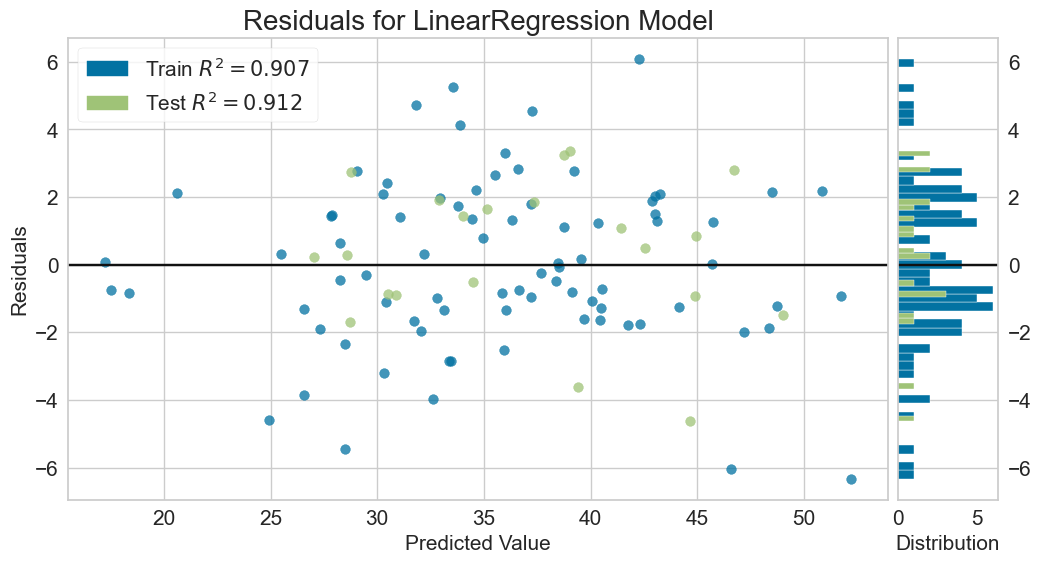

In [60]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

### Check Residuals - PredictionError

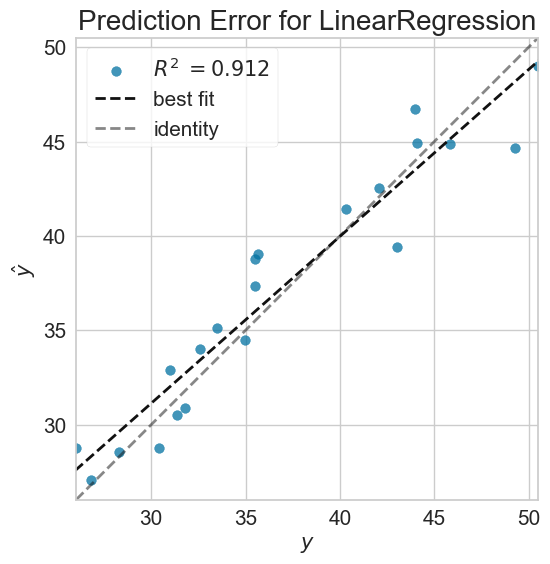

In [61]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

## Linear Model Model Fitting and Predicting - with Pipeline and with Scale

In [62]:
from sklearn.linear_model import LinearRegression
# pipeline is used to combine scaler and model
from sklearn.pipeline import Pipeline 

# will be used in pipeline
lm = LinearRegression() 
scaler = StandardScaler() 

# pipeline is used to combine scaler and model
pipe_lm = Pipeline(steps=[ 
    ("scaler", scaler) 
    ,("lm", lm) 
]) 
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [63]:
y_pred = pipe_lm.predict(X_test) 
y_train_pred = pipe_lm.predict(X_train) 

### Calculate Manual Actual and Predicted Labels 

In [64]:
# check coeff different after scalar process
get_coeff_intercept(
    pipe_lm.named_steps["lm"].coef_, 
    pipe_lm.named_steps["lm"].intercept_
)

,Coefficient_linear
Cement,4.280152
Slag,-2.222880
Fly ash,3.932020
Water,-4.770839
SP,0.121100
Coarse Aggr.,-5.277291
Fine Aggr.,-2.611313
SLUMP(cm),-2.188378
FLOW(cm),1.465706
intercept,35.847195


In [65]:
df_comparing.head(2)

,Actual,Prediction,Residual
30,45.820000,44.888792,-0.931208
67,40.340000,41.416085,1.076085


In [66]:
# Use scaled coeff for scaled data or vice versa
X_test_scaled[0]

array([ 1.14934917, -1.29720985,  0.21399196, -0.31414099, -1.21785265,
       -0.20967429,  0.56267018,  0.70678525,  0.65191812])

In [67]:
# Data = not scaled vs scaled 
X_test.loc[30], print(), pd.Series(X_test_scaled[0], index=X.columns)

(Cement         321.000000
 Slag             0.000000
 Fly ash        164.000000
 Water          190.000000
 SP               5.000000
 Coarse Aggr.   870.000000
 Fine Aggr.     774.000000
 SLUMP(cm)       24.000000
 FLOW(cm)        60.000000
 Name: 30, dtype: float64,
 None,
 Cement          1.149349
 Slag           -1.297210
 Fly ash         0.213992
 Water          -0.314141
 SP             -1.217853
 Coarse Aggr.   -0.209674
 Fine Aggr.      0.562670
 SLUMP(cm)       0.706785
 FLOW(cm)        0.651918
 dtype: float64)

In [68]:
# manual calc after scalar process predict
y_test.loc[30], sum(pipe_lm.named_steps["lm"].coef_*X_test_scaled[0]) + pipe_lm.named_steps["lm"].intercept_

(45.82, 44.8887916677886)

In [69]:
# Calc Prediction vs Actual
y_test.loc[30], sum(lin_model.coef_*X_test.loc[30]) + lin_model.intercept_

(45.82, 44.88879166778861)

# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [70]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline 

# will be used in pipeline later
scaler = StandardScaler() 

# will be used in pipeline later
ridge_model = Ridge(
    alpha=1, 
    random_state=random_state
)
# pipeline is used to combine scaler and model
pipe_ridge = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [71]:
y_pred = pipe_ridge.predict(X_test)
y_train_pred = pipe_ridge.predict(X_train)

In [72]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628


In [73]:
pd.concat([ls, rs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907145,0.911967,0.906392,0.911204
mae,1.936263,1.740383,1.938096,1.732472
mse,5.874313,4.454237,5.921967,4.492822
rmse,2.423698,2.110506,2.433509,2.119628


In [74]:
pd.Series(pipe_ridge['ridge'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               None
normalize        deprecated
positive              False
random_state             42
solver                 auto
tol                0.001000
dtype: object

### Ridge Regression Check Cross Validation with alpha : 1

In [75]:
scaler = StandardScaler() 
ridge_model = Ridge(
    alpha=1, 
    random_state=random_state
)
model = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)
df_scores_ridge = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_ridge

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.007998,0.003999,0.945011,-1.837154,-4.419908,-2.102358
1,0.006002,0.003998,0.708681,-2.651491,-10.681426,-3.268245
2,0.005000,0.004000,0.870580,-1.487804,-3.596664,-1.896487
3,0.004999,0.003000,0.920645,-2.255780,-8.710815,-2.951409
4,0.005004,0.003996,0.804676,-2.793295,-11.032516,-3.321523


In [76]:
df_scores_ridge.iloc[:, 2:].mean()

test_r2                             0.849918
test_neg_mean_absolute_error       -2.205105
test_neg_mean_squared_error        -7.688266
test_neg_root_mean_squared_error   -2.708004
dtype: float64

In [77]:
# crosscheck before-after
rs

,ridge_train,ridge_test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628


In [78]:
rm_df = get_coeff_intercept(
    pipe_ridge["ridge"].coef_, 
    pipe_ridge["ridge"].intercept_, 
    model_name=f'ridge_alpha_{pipe_ridge["ridge"].alpha}'
)
rm_df

,Coefficient_ridge_alpha_1
Cement,5.010922
Slag,-1.377652
Fly ash,4.806274
Water,-3.906449
SP,0.261385
Coarse Aggr.,-4.066443
Fine Aggr.,-1.746605
SLUMP(cm),-1.954987
FLOW(cm),1.133500
intercept,35.847195


In [79]:
pd.concat([lm_df, rm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1
Cement,0.054190,5.010922
Slag,-0.036492,-1.377652
Fly ash,0.044675,4.806274
Water,-0.233374,-3.906449
SP,0.041601,0.261385
Coarse Aggr.,-0.060089,-4.066443
Fine Aggr.,-0.041999,-1.746605
SLUMP(cm),-0.243203,-1.954987
FLOW(cm),0.082191,1.133500
intercept,149.990175,35.847195


###  Ridge Regression Choosing Alpha value

In [80]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [81]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline 

alpha_space = np.linspace(0.1, 1, 100)

scaler = StandardScaler() 
ridgecv_model = RidgeCV(
    alphas=alpha_space, 
    scoring= "neg_root_mean_squared_error",
    cv = 10
)
# pipeline is used to combine scaler and model
pipe_ridgecv = Pipeline([
    ("scaler", scaler), 
    ("ridgecv", ridgecv_model)
]) 
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [82]:
pipe_ridgecv["ridgecv"].alpha_

0.9181818181818181

In [83]:
# Ridge( alpha = 0.91)
y_pred = pipe_ridgecv.predict(X_test)
y_train_pred = pipe_ridgecv.predict(X_train)

In [84]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv") 
rcs

,ridge_cv_train,ridge_cv_test
R2,0.906476,0.911355
mae,1.937773,1.732412
mse,5.916637,4.485191
rmse,2.432414,2.117827


In [85]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827


In [86]:
pd.Series(pipe_ridgecv["ridgecv"].get_params())

alpha_per_target                                                False
alphas              [0.1, 0.1090909090909091, 0.1181818181818182, ...
cv                                                                 10
fit_intercept                                                    True
gcv_mode                                                         None
normalize                                                  deprecated
scoring                                   neg_root_mean_squared_error
store_cv_values                                                 False
dtype: object

In [87]:
rcm_df = get_coeff_intercept(
    pipe_ridgecv["ridgecv"].coef_, 
    pipe_ridgecv["ridgecv"].intercept_, 
    model_name=f'ridgecv_alpha_{pipe_ridgecv["ridgecv"].alpha_}'
)
rcm_df

,Coefficient_ridgecv_alpha_0.9181818181818181
Cement,5.005213
Slag,-1.389454
Fly ash,4.796521
Water,-3.931707
SP,0.258058
Coarse Aggr.,-4.092323
Fine Aggr.,-1.763298
SLUMP(cm),-1.969969
FLOW(cm),1.155002
intercept,35.847195


In [88]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.9181818181818181
Cement,0.054190,5.010922,5.005213
Slag,-0.036492,-1.377652,-1.389454
Fly ash,0.044675,4.806274,4.796521
Water,-0.233374,-3.906449,-3.931707
SP,0.041601,0.261385,0.258058
Coarse Aggr.,-0.060089,-4.066443,-4.092323
Fine Aggr.,-0.041999,-1.746605,-1.763298
SLUMP(cm),-0.243203,-1.954987,-1.969969
FLOW(cm),0.082191,1.133500,1.155002
intercept,149.990175,35.847195,35.847195


## 2.2 Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [89]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline 

scaler = StandardScaler() 
lasso_model = Lasso(
    alpha=1, 
    random_state=random_state
)
# pipeline is used to combine scaler and model
pipe_lasso = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
]) 
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [90]:
y_pred = pipe_lasso.predict(X_test)
y_train_pred = pipe_lasso.predict(X_train)

In [91]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") 
lss

,lasso_train,lasso_test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025


In [92]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025


In [93]:
pd.Series(pipe_lasso['lasso'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state             42
selection            cyclic
tol                0.000100
warm_start            False
dtype: object

### Lasso Regression Cross Validation with Default Alpha : 1

In [94]:
scaler = StandardScaler() 
lasso_model = Lasso(
    alpha=1, 
    random_state=random_state
)
model = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)
df_scores_lasso = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lasso

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.008011,0.003355,0.826285,-3.154233,-13.962787,-3.736681
1,0.005037,0.004000,0.499657,-3.387816,-18.345441,-4.283158
2,0.005999,0.003000,0.676319,-2.382057,-8.995287,-2.999214
3,0.004992,0.003476,0.681643,-4.372939,-34.945941,-5.911509
4,0.005006,0.002999,0.736091,-3.244457,-14.906371,-3.860877


In [95]:
df_scores_lasso.iloc[:, 2:].mean()

test_r2                              0.683999
test_neg_mean_absolute_error        -3.308301
test_neg_mean_squared_error        -18.231165
test_neg_root_mean_squared_error    -4.158288
dtype: float64

<AxesSubplot:>

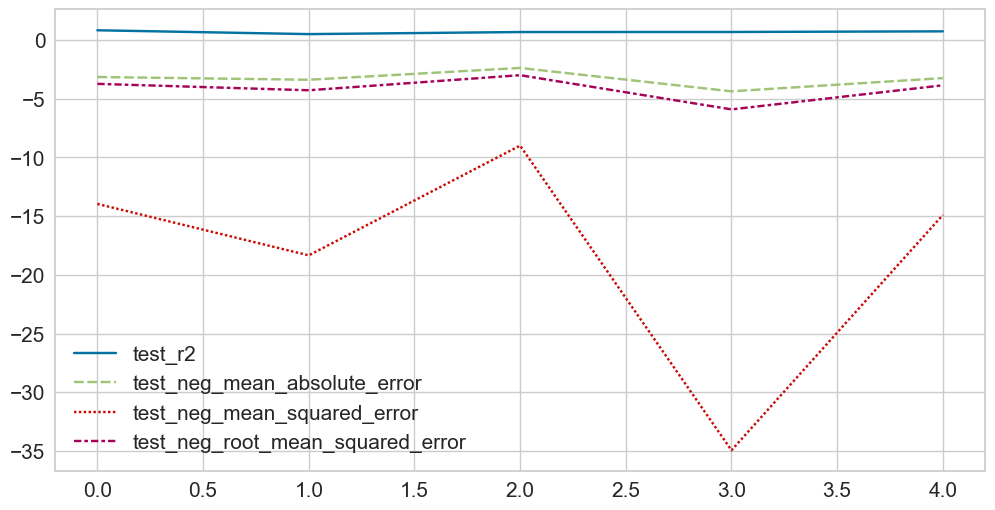

In [96]:
sns.lineplot(data=df_scores_lasso.iloc[:, 2:])

In [97]:
# crosscheck before-after
lss

,lasso_train,lasso_test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025


In [98]:
lsm_df = get_coeff_intercept(
    pipe_lasso["lasso"].coef_, 
    pipe_lasso["lasso"].intercept_, 
    model_name=f'lasso_alpha_{pipe_lasso["lasso"].alpha}'
)
lsm_df

,Coefficient_lasso_alpha_1
Cement,4.821314
Slag,-0.000000
Fly ash,4.880053
Water,-0.819769
SP,0.000000
Coarse Aggr.,-0.351495
Fine Aggr.,-0.000000
SLUMP(cm),-0.710631
FLOW(cm),-0.000000
intercept,35.847195


In [99]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.9181818181818181,Coefficient_lasso_alpha_1
Cement,0.054190,5.010922,5.005213,4.821314
Slag,-0.036492,-1.377652,-1.389454,-0.000000
Fly ash,0.044675,4.806274,4.796521,4.880053
Water,-0.233374,-3.906449,-3.931707,-0.819769
SP,0.041601,0.261385,0.258058,0.000000
Coarse Aggr.,-0.060089,-4.066443,-4.092323,-0.351495
Fine Aggr.,-0.041999,-1.746605,-1.763298,-0.000000
SLUMP(cm),-0.243203,-1.954987,-1.969969,-0.710631
FLOW(cm),0.082191,1.133500,1.155002,-0.000000
intercept,149.990175,35.847195,35.847195,35.847195


### Lasso Regression choosing  best Alpha value

In [100]:
alpha_space = np.linspace(0.1, 1, 10)
alpha_space

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [101]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline 

scaler = StandardScaler() 
lassocv_model = LassoCV(
    alphas=alpha_space, 
    max_iter=100000, 
    cv=10, 
    random_state=random_state
) 
pipe_lassocv = Pipeline([
    ("scaler", scaler), 
    ("lassocv", lassocv_model)
]) 
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         cv=10, max_iter=100000, random_state=42))])

In [102]:
pipe_lassocv["lassocv"].alpha_

0.1

In [103]:
alpha_space.shape

(10,)

In [104]:
np.where(alpha_space==pipe_lassocv["lassocv"].alpha_)

(array([0], dtype=int64),)

In [105]:
pipe_lassocv["lassocv"].mse_path_[0].mean()

17.12344467865642

In [106]:
y_pred = pipe_lassocv.predict(X_test)   
y_train_pred = pipe_lassocv.predict(X_train)

In [107]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184


In [108]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184


In [109]:
lcm_df = get_coeff_intercept(
    pipe_lassocv["lassocv"].coef_, 
    pipe_lassocv["lassocv"].intercept_, 
    model_name=f'lassocv_alpha_{pipe_lassocv["lassocv"].alpha_}')
lcm_df

,Coefficient_lassocv_alpha_0.1
Cement,6.360581
Slag,0.000000
Fly ash,6.448608
Water,-2.385571
SP,0.467338
Coarse Aggr.,-2.090038
Fine Aggr.,-0.228233
SLUMP(cm),-1.081774
FLOW(cm),0.000000
intercept,35.847195


In [110]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.9181818181818181,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.1
Cement,0.054190,5.010922,5.005213,4.821314,6.360581
Slag,-0.036492,-1.377652,-1.389454,-0.000000,0.000000
Fly ash,0.044675,4.806274,4.796521,4.880053,6.448608
Water,-0.233374,-3.906449,-3.931707,-0.819769,-2.385571
SP,0.041601,0.261385,0.258058,0.000000,0.467338
Coarse Aggr.,-0.060089,-4.066443,-4.092323,-0.351495,-2.090038
Fine Aggr.,-0.041999,-1.746605,-1.763298,-0.000000,-0.228233
SLUMP(cm),-0.243203,-1.954987,-1.969969,-0.710631,-1.081774
FLOW(cm),0.082191,1.133500,1.155002,-0.000000,0.000000
intercept,149.990175,35.847195,35.847195,35.847195,35.847195


## 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [111]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.pipeline import Pipeline 

scaler = StandardScaler() 
elastic_model = ElasticNet(
    alpha=1, 
    l1_ratio=0.5, 
    random_state=random_state
) 
# pipeline is used to combine scaler and model
pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
]) 
pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [112]:
y_pred = pipe_elastic.predict(X_test)
y_train_pred = pipe_elastic.predict(X_train)

In [113]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257


In [114]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257


In [115]:
pd.Series(pipe_elastic["elastic"].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
l1_ratio           0.500000
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state             42
selection            cyclic
tol                0.000100
warm_start            False
dtype: object

### Elastic_net Regression Check Cross Validation with Default Alpha : 1 and l1_ratio=0.5

In [116]:
scaler = StandardScaler() 
elastic_model = ElasticNet(
    alpha=1, 
    l1_ratio=0.5, 
    random_state=random_state
) 
model = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error']
    , cv=5
)
df_scores_elastic = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_elastic

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.007001,0.003001,0.559420,-4.933674,-35.412716,-5.950858
1,0.005097,0.002903,0.466474,-3.311646,-19.562145,-4.422911
2,0.006001,0.004042,0.537252,-3.036801,-12.860032,-3.586089
3,0.008200,0.003832,0.540848,-5.517945,-50.401042,-7.099369
4,0.006021,0.003002,0.625048,-4.116153,-21.178438,-4.602004


In [117]:
df_scores_elastic.iloc[:, 2:].mean()

test_r2                              0.545808
test_neg_mean_absolute_error        -4.183244
test_neg_mean_squared_error        -27.882875
test_neg_root_mean_squared_error    -5.132246
dtype: float64

In [118]:
# crosscheck before-after
es

,elastic_train,elastic_test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257


In [119]:
dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)

{'alpha': 1, 'l1_ratio': 0.5}

In [120]:
em_df = get_coeff_intercept(
    pipe_elastic["elastic"].coef_, 
    pipe_elastic["elastic"].intercept_, 
    model_name=f'elastic_{dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)}')
em_df

,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
Cement,2.616571
Slag,-0.730153
Fly ash,2.671399
Water,-1.201959
SP,0.000000
Coarse Aggr.,-1.163868
Fine Aggr.,-0.322340
SLUMP(cm),-0.825696
FLOW(cm),-0.000000
intercept,35.847195


In [121]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.9181818181818181,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.1,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
Cement,0.054190,5.010922,5.005213,4.821314,6.360581,2.616571
Slag,-0.036492,-1.377652,-1.389454,-0.000000,0.000000,-0.730153
Fly ash,0.044675,4.806274,4.796521,4.880053,6.448608,2.671399
Water,-0.233374,-3.906449,-3.931707,-0.819769,-2.385571,-1.201959
SP,0.041601,0.261385,0.258058,0.000000,0.467338,0.000000
Coarse Aggr.,-0.060089,-4.066443,-4.092323,-0.351495,-2.090038,-1.163868
Fine Aggr.,-0.041999,-1.746605,-1.763298,-0.000000,-0.228233,-0.322340
SLUMP(cm),-0.243203,-1.954987,-1.969969,-0.710631,-1.081774,-0.825696
FLOW(cm),0.082191,1.133500,1.155002,-0.000000,0.000000,-0.000000
intercept,149.990175,35.847195,35.847195,35.847195,35.847195,35.847195


### **Grid Search for ElasticNet for choosing best elastic__alpha - elastic__l1_ratio**

In [122]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [123]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler() 
elastic_model = ElasticNet(
    max_iter=10000, 
    random_state=random_state
) 
# pipeline is used to combine scaler and model
pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
]) 
# define elastic__l1_ratio (0.1, 1)
ratio_space = np.concatenate((np.linspace(0.1, 0.2, 3), np.arange(0.3, 0.8, 0.2), np.linspace(0.9, 1, 3)))
ratio_space
param_grid = {
    "elastic__alpha":alpha_space,
    "elastic__l1_ratio":ratio_space
}
grid_model = GridSearchCV(
    estimator = pipe_elastic, 
    param_grid = param_grid, 
    scoring = 'neg_root_mean_squared_error',
    cv =10, 
#     verbose=2,
)

In [124]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic',
                                        ElasticNet(max_iter=10000,
                                                   random_state=42))]),
             param_grid={'elastic__alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545,...
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'elastic__l1_ratio': array([0.1 , 0.15, 0.2 , 0.3 , 0.5 , 0.7 , 0.9 , 0.95, 1.  ])},
             scoring='neg_root_mean_squared_error')

In [125]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [126]:
gm = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm

,elastic_grid_train,elastic_grid_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184


In [127]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_grid_train,elastic_grid_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257,2.509041,2.158184


In [128]:
# pd.Series(grid_model.get_params())

In [129]:
grid_model.best_params_

{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}

In [130]:
grid_model.best_score_

-2.741442994105923

In [131]:
grid_model.best_index_

8

In [132]:
egm_df = get_coeff_intercept(
    grid_model.best_estimator_.named_steps['elastic'].coef_, 
    grid_model.best_estimator_.named_steps['elastic'].intercept_, 
    model_name=f'elastic_grid_{grid_model.best_params_}')
egm_df

,"Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}"
Cement,6.360581
Slag,0.000000
Fly ash,6.448608
Water,-2.385571
SP,0.467338
Coarse Aggr.,-2.090038
Fine Aggr.,-0.228233
SLUMP(cm),-1.081774
FLOW(cm),0.000000
intercept,35.847195


In [133]:
df_coeff = pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, egm_df], axis = 1)
df_coeff

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.9181818181818181,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.1,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}","Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}"
Cement,0.054190,5.010922,5.005213,4.821314,6.360581,2.616571,6.360581
Slag,-0.036492,-1.377652,-1.389454,-0.000000,0.000000,-0.730153,0.000000
Fly ash,0.044675,4.806274,4.796521,4.880053,6.448608,2.671399,6.448608
Water,-0.233374,-3.906449,-3.931707,-0.819769,-2.385571,-1.201959,-2.385571
SP,0.041601,0.261385,0.258058,0.000000,0.467338,0.000000,0.467338
Coarse Aggr.,-0.060089,-4.066443,-4.092323,-0.351495,-2.090038,-1.163868,-2.090038
Fine Aggr.,-0.041999,-1.746605,-1.763298,-0.000000,-0.228233,-0.322340,-0.228233
SLUMP(cm),-0.243203,-1.954987,-1.969969,-0.710631,-1.081774,-0.825696,-1.081774
FLOW(cm),0.082191,1.133500,1.155002,-0.000000,0.000000,-0.000000,0.000000
intercept,149.990175,35.847195,35.847195,35.847195,35.847195,35.847195,35.847195


#### Grid Search for ElasticNet vs Lasso Result

In [134]:
df_coeff.columns

Index(['Coefficient_linear', 'Coefficient_ridge_alpha_1',
       'Coefficient_ridgecv_alpha_0.9181818181818181',
       'Coefficient_lasso_alpha_1', 'Coefficient_lassocv_alpha_0.1',
       'Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}',
       'Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}'],
      dtype='object')

In [135]:
df_coeff.iloc[:, [4, 6]]

,Coefficient_lassocv_alpha_0.1,"Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}"
Cement,6.360581,6.360581
Slag,0.000000,0.000000
Fly ash,6.448608,6.448608
Water,-2.385571,-2.385571
SP,0.467338,0.467338
Coarse Aggr.,-2.090038,-2.090038
Fine Aggr.,-0.228233,-0.228233
SLUMP(cm),-1.081774,-1.081774
FLOW(cm),0.000000,0.000000
intercept,35.847195,35.847195


In [136]:
# check difference zero
df_coeff.iloc[:, [4, 6]].diff(axis=1).sum()

Coefficient_lassocv_alpha_0.1                                                0.000000
Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}   0.000000
dtype: float64

## **Result:________**

- my model work %100 lasso and alpha: 0.1

# Feature importances

## Feature importances with Ridge

In [137]:
pipe_ridgecv["ridgecv"].alpha_

0.9181818181818181

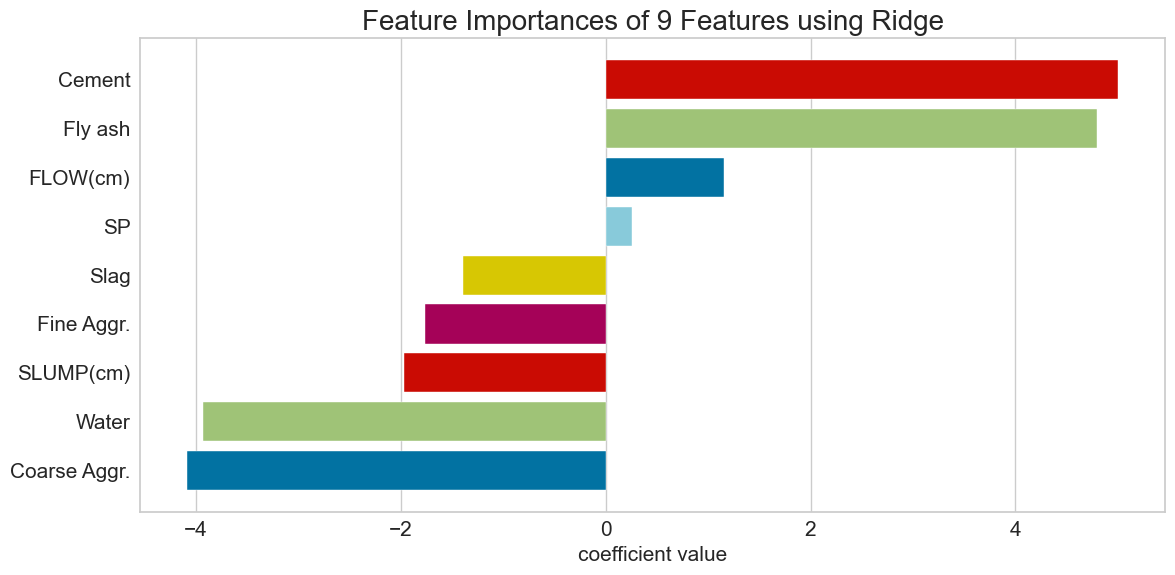

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Ridge'}, xlabel='coefficient value'>

In [138]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)  # ridge_cv_model.alpha_ = 0.91
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

## Feature importances with Lasso

In [139]:
pipe_lassocv["lassocv"].alpha_

0.1

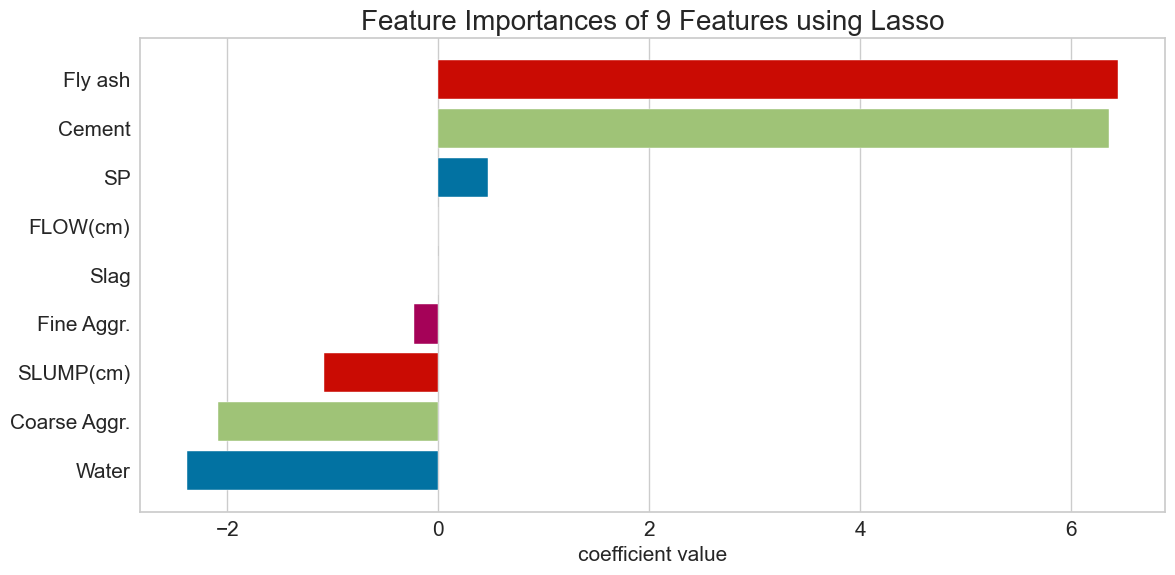

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Lasso'}, xlabel='coefficient value'>

In [140]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(X.columns), stack=True, relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

### Feature importances Crosscheck yellowbrick vs Lasso

In [141]:
viz.estimator.alpha

0.1

In [142]:
viz.estimator.l1_ratio

1.0

In [143]:
pd.Series(viz.feature_importances_, index=viz.features_
    ).sort_values(key =abs, ascending=False
    ).to_frame(f'Coefficient_Viz_{viz.estimator}')

,Coefficient_Viz_Lasso(alpha=0.1)
Fly ash,6.448608
Cement,6.360581
Water,-2.385571
Coarse Aggr.,-2.090038
SLUMP(cm),-1.081774
SP,0.467338
Fine Aggr.,-0.228233
Slag,0.000000
FLOW(cm),0.000000


In [144]:
egm_df.sort_values(by=egm_df.columns[0], key =abs, ascending=False)

,"Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}"
intercept,35.847195
Fly ash,6.448608
Cement,6.360581
Water,-2.385571
Coarse Aggr.,-2.090038
SLUMP(cm),-1.081774
SP,0.467338
Fine Aggr.,-0.228233
Slag,0.000000
FLOW(cm),0.000000


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___